<a href="https://colab.research.google.com/github/TrinhViKhang/PhanTichDuLieuvaHocSau/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1.

In [1]:
import pandas as pd
def load_data(titanic):
  df = pd.read_csv(titanic)
  return df

data_titanic = load_data("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv")
data_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


3.

In [4]:

data_titanic[['Firstname', 'secondName']]=data_titanic['Name'].str.split(",",expand = True)

data_titanic = data_titanic.drop('Name',axis=1)
data_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


4.

In [5]:

data_titanic['Sex'].replace({'male':'M','female':'F'},inplace=True)
data_titanic.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


5.

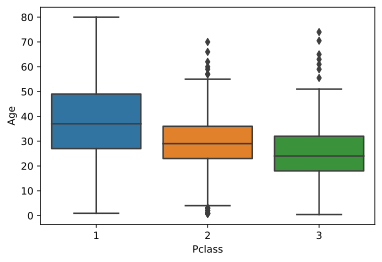

In [6]:
sns.boxplot(y='Age', x='Pclass', data = data_titanic)

Nhận Xét: 
- Nhóm hạng Pclass = 1 có tuổi trung bình cao hơn so với hạng 2 và  hạng 3.
- Dùng giá trị trung bình tuổi toàn bộ hành khách để thay thế dữ liệu thiếu trên biến Age.

In [7]:
data_titanic['Age'].fillna(round(data_titanic['Age'].mean()), inplace= True)
data_titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,M,30.0,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(data_titanic.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

6.

In [9]:
data_titanic.loc[(data_titanic['Age'] <= 12), 'Agegroup'] = 'Kid'
data_titanic.loc[(data_titanic['Age'] > 12) & (data_titanic['Age'] <= 18), 'Agegroup'] = 'Teen'
data_titanic.loc[(data_titanic['Age'] > 18) & (data_titanic['Age'] <= 60), 'Agegroup'] = 'Adult'
data_titanic.loc[(data_titanic['Age'] > 60), 'Agegroup'] = 'Older'

data_titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,secondName,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult
5,6,0,3,M,30.0,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen


7.

In [10]:
secondName=data_titanic['secondName']
for i in range(len(secondName)):
  x = str(secondName[i])
  data_titanic['namePrefix'] = secondName.apply(lambda x: x[5:] if 'Mr.' in x else (x[6:] if 'Mrs.' in x else (x[7:] if 'Miss' in x else (x[9:] if 'Master' in x else None))))

data_titanic.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,secondName,Agegroup,namePrefix
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,William Henry


Phần 2:

1.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f87f2508a10>,
      dtype=object)

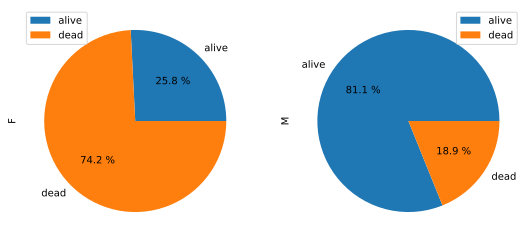

In [11]:
import matplotlib.pyplot as plt
data_Survived_Sex = data_titanic.groupby(['Survived','Sex'])[['Sex']].count().unstack()


data_Survived_Sex['Sex'].rename(index={0:'alive',1:'dead'}).plot.pie(autopct = '%.1f %%', subplots=True, figsize=(9, 6))

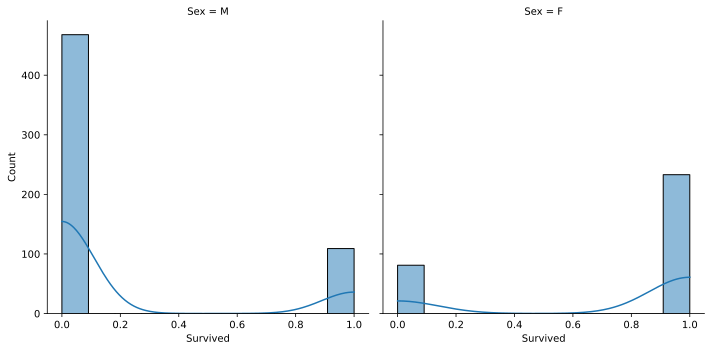

In [12]:
sns.displot(data_titanic, x="Survived", col="Sex", kde=True)

2.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f87f3e6e250>,
      dtype=object)

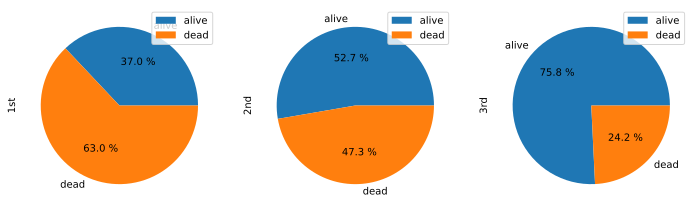

In [13]:
data_Survived_Pclass = data_titanic.groupby(['Survived','Pclass'])[['Pclass']].count().unstack()

data_Survived_Pclass['Pclass'].rename(index={0:'alive',1:'dead'}).rename(columns={1:'1st',2:'2nd',3:'3rd'}).plot.pie(autopct = '%.1f %%', subplots=True, figsize=(12, 6))

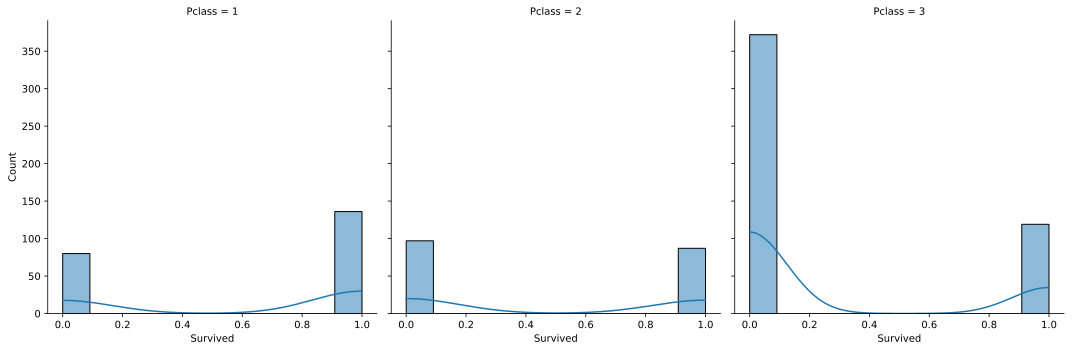

In [14]:
sns.displot(data_titanic, x="Survived", col="Pclass", kde=True)

3.

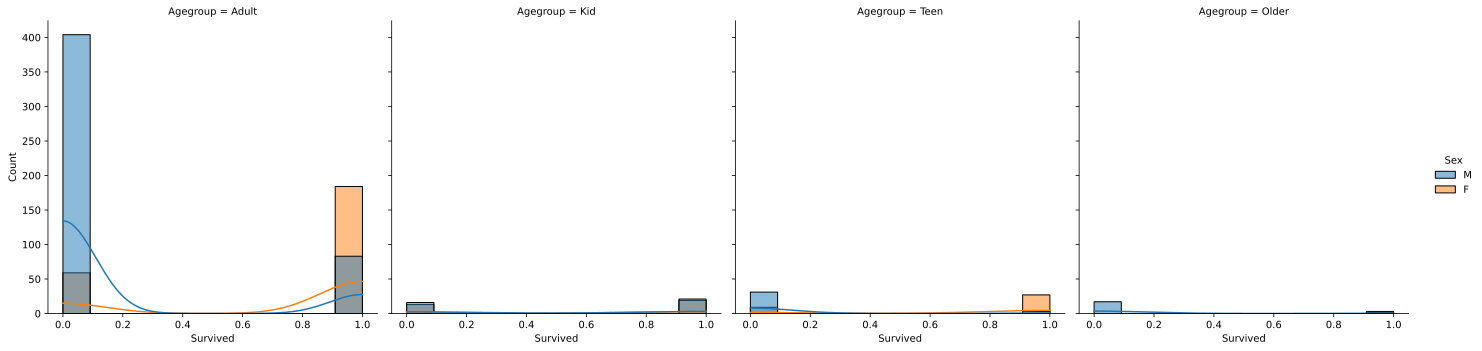

In [15]:
sns.displot(data_titanic, x="Survived", col="Agegroup", hue='Sex', kde=True)